<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/tag_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tokenization
!pip install nltk
!pip install pymorphy2

Библиотеки и функции

In [0]:
from google.colab import drive
import re
import tokenization
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud
drive.mount('/content/drive')
nltk.download('stopwords')

stop_words = list(set(stopwords.words("russian")))


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]

def get_normalize_text(text):
    text=text.lower()
    words=re.findall(r"[\w']+|[.,!?;:{}() \n]",text)
    words=normalize_tokens(words)
    words=[t for t in words if len(t)>2]
    words=[word for word in words if word not in stop_words]
    return words

def uniq_dic(words):
    vocab={}
    for word in words:
      vocab[word]=vocab.get(word,0)+1
    return vocab

def plot_WordCloud(dict,title):
    wc = WordCloud(width=2600, height=2200, background_color="white", relative_scaling=1.0,
                  collocations=False, min_font_size=10).generate_from_frequencies(dict)
    plt.axis("off")
    plt.figure(figsize=(9, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()



---


Почитать про WordCloud [можно здесь](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

---



# Облако тегов для одного текста



![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Web_2.0_Map.svg/1280px-Web_2.0_Map.svg.png)
# [О́блако те́гов](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D0%BB%D0%B0%D0%BA%D0%BE_%D1%82%D0%B5%D0%B3%D0%BE%D0%B2): 
(облако слов, или взвешенный список, представленное(-ый) визуально) — это визуальное представление списка категорий (или тегов, также называемых метками, ярлыками, ключевыми словами и т. п.)[1] Обычно используется для описания ключевых слов (тегов) на веб-сайтах, или для представления неформатированного текста. Ключевые слова чаще всего представляют собой отдельные слова, и важность каждого ключевого слова обозначается размером шрифта или цветом[⇨]. Такое представление удобно для быстрого восприятия наиболее известных терминов и для распределения терминов по популярности относительно друг друга[⇨]. При использовании ключевых слов для упрощения навигации по веб-сайтам, термины снабжаются гиперссылками на понятия, которые подразумеваются под ключевыми словами. Тем не менее, облако не может быть единственным элементом навигации, а пользоваться текстовым поиском удобнее для поиска при наличии более конкретной информации об искомом[2].

**Текст с учетом/без предобработки и стоп слов**

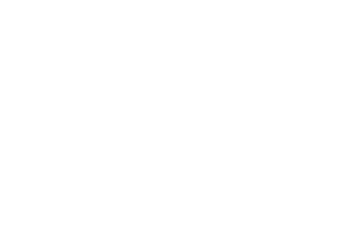

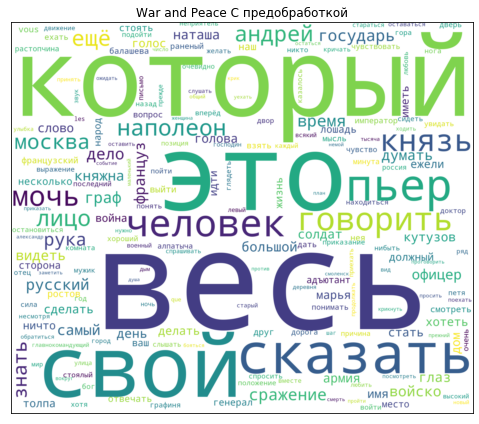

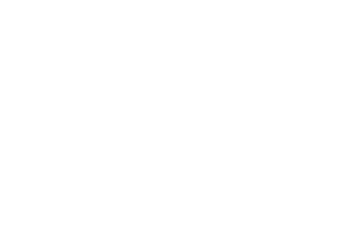

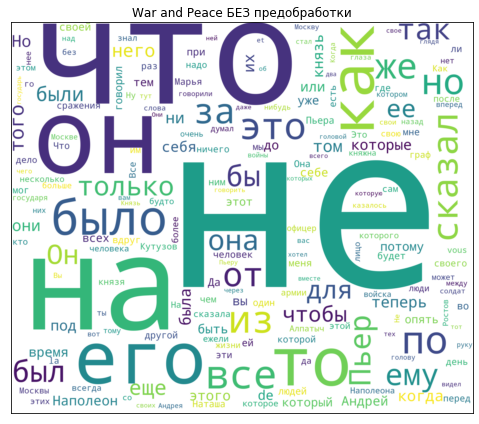

In [49]:
s=open('/content/drive/My Drive/Colab Notebooks/тексты/35000Толстой Лев. Война и мир. Том 3 - royallib.ru.txt','r')
text=s.read()
s.close()

words=get_normalize_text(text)
vocab=uniq_dic(words)
plot_WordCloud(vocab,"War and Peace С предобработкой")

words2=re.findall(r"[\w']+|[.,!?;:{}() \n]",text)
words2=[t for t in words2 if len(t)>1]
vocabilar=uniq_dic(words2)
plot_WordCloud(vocabilar,"War and Peace БЕЗ предобработки")

# Речи **Путина**

[Новогодняя речь за 2018](http://kremlin.ru/events/president/news/59629)

[Новогодняя речь за 2019](https://tass.ru/obschestvo/7453839)



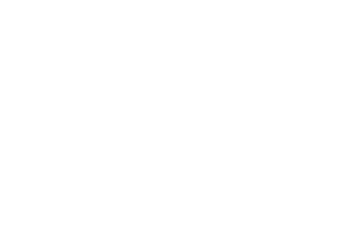

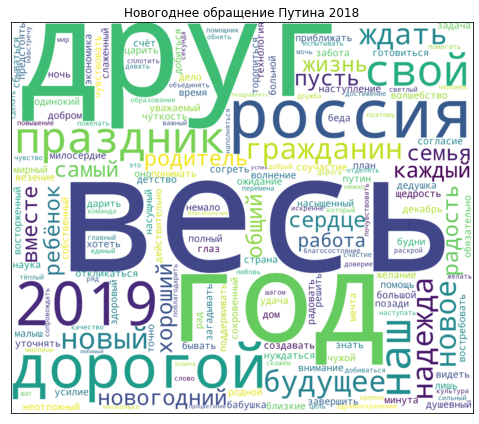

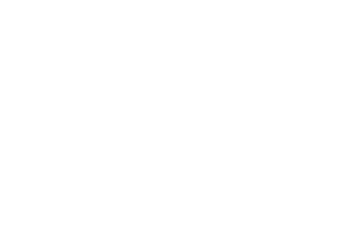

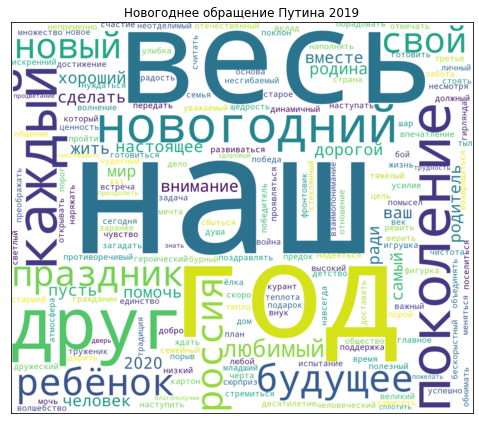

In [48]:
s=open('/content/drive/My Drive/Colab Notebooks/тексты/Путин2018.txt','r')
text18=s.read()
s.close()

s=open('/content/drive/My Drive/Colab Notebooks/тексты/Путин2019.txt','r')
text19=s.read()
s.close()

words18=get_normalize_text(text18)
vocab18=uniq_dic(words18)
plot_WordCloud(vocab18,"Новогоднее обращение Путина 2018")

words19=get_normalize_text(text19)
vocab19=uniq_dic(words19)
plot_WordCloud(vocab19,"Новогоднее обращение Путина 2019")


![alt text](https://static.mk.ru/upload/entities/2020/03/05/10/articles/detailPicture/80/e1/f1/f9/2acda9218771be5ef15cbc34d6fda1a7.jpg)